## Project: Development of segmentation and customer value framework for retail loyalty programs.

**problem statememt:**
1) Existing marketing campaigns (unmonitored and untargeted approach) are not very effective, and returns are poor, infect last quarter was under loss

2) Sales from last 2 quarters are very low and concerning

3) Mass Campaigns cost is high and mass effectiveness is very low

**objectives:**
1) Identifying customers with similar behavior  in the loyalty program

2) Segmenting customers with similar behavior and list down their behavioral traits

3) Basis on the profile of every cluster , we have to create campaigns which are likely to generate more revenue


#### Step1: Importing Datasets & formatting (if required)

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")


In [2]:
#additional Libraries if any

In [3]:
#importing given data files.
transactions = pd.read_csv(r"Retail\transactions.csv")
promotions = pd.read_csv(r"Retail\promotions.csv")
campaign_descriptions = pd.read_csv(r"Retail\campaign_descriptions.csv")
campaigns = pd.read_csv(r"Retail\campaigns.csv")
coupon_redemptions = pd.read_csv(r"Retail\coupon_redemptions.csv")
coupons = pd.read_csv(r"Retail\coupons.csv")
demographics = pd.read_csv(r"Retail\demographics.csv")
products = pd.read_csv(r"Retail\products.csv")

In [4]:
#converting dates in these datasets in proper date formats.
transactions['transaction_date'] = transactions.transaction_timestamp.str[:10]
transactions.transaction_date = pd.to_datetime(transactions.transaction_date, format = '%Y-%m-%d')
campaign_descriptions.start_date = pd.to_datetime(campaign_descriptions.start_date, format = '%Y-%m-%d')
campaign_descriptions.end_date = pd.to_datetime(campaign_descriptions.end_date, format = '%Y-%m-%d')
coupon_redemptions.redemption_date = pd.to_datetime(coupon_redemptions.redemption_date, format = '%Y-%m-%d')

#### Step2: Understanding the datasets and inferences

**campaign Descriprition:**

Campaign description, containing the start and the end days of each campaign (27 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C).

In [5]:
campaign_descriptions.head()

,campaign_id,campaign_type,start_date,end_date
0,1,Type B,2017-03-03,2017-04-09
1,2,Type B,2017-03-08,2017-04-09
2,3,Type C,2017-03-13,2017-05-08
3,4,Type B,2017-03-29,2017-04-30
4,5,Type B,2017-04-03,2017-05-07


In [8]:
campaign_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    27 non-null     int64         
 1   campaign_type  27 non-null     object        
 2   start_date     27 non-null     datetime64[ns]
 3   end_date       27 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 992.0+ bytes


In [9]:
#total campaign
campaign_descriptions.campaign_id.nunique()

27

In [10]:
campaign_descriptions.campaign_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [11]:
#calculating diff between start & end date
campaign_descriptions['diff'] = (campaign_descriptions.end_date - campaign_descriptions.start_date).dt.days

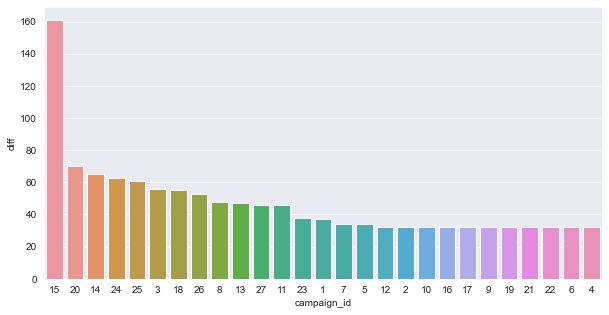

In [12]:
#Let's calculate and visualise how long each campaign lasted:
fig = plt.figure(figsize=(10,5))
sns.barplot(x="campaign_id",y="diff",data=campaign_descriptions,orient="v",order=campaign_descriptions.sort_values(by="diff",ascending=False).campaign_id.values);

In [13]:
campaign_descriptions.describe()

,campaign_id,diff
count,27.000000,27.000000
mean,14.000000,46.888889
std,7.937254,25.927908
min,1.000000,32.000000
25%,7.500000,32.000000
50%,14.000000,37.000000
75%,20.500000,54.000000
max,27.000000,161.000000


**inference from Campaign_description dataset**

1) Campaign No:15 lasts the longest with a max 161 days figure. It's an important attribute and can not be called as non worthy outlier.

2) where other campaigns are fairly close to each other ranging from 32 to 70 days.

3) Average campaign duration is 37 days (median)

**campaign**

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [14]:
campaigns.head()

,campaign_id,household_id
0,1,105
1,1,1238
2,1,1258
3,1,1483
4,1,2200


In [15]:
total_household = transactions.household_id.nunique()
total_household

2469

In [16]:
total_houshold_campaign_received = campaigns.household_id.nunique()
total_houshold_campaign_received

1559

In [17]:
total_household_with_no_campaign_received = total_household - total_houshold_campaign_received
total_household_with_no_campaign_received

910

In [19]:
#percentage of household received a campaign(s)
round(total_houshold_campaign_received/total_household*100,1)

63.1

In [20]:
campaign_received_per_house = campaigns.household_id.value_counts()
campaign_received_per_house

2317    15
2459    14
2489    14
718     13
676     13
        ..
1429     1
1493     1
1569     1
1593     1
4        1
Name: household_id, Length: 1559, dtype: int64

In [21]:
#example: how many houses received 1 campaign, how many houses received 2 campaigns 
no_of_received_campaigns = campaign_received_per_house.value_counts()
no_of_received_campaigns

1     277
2     234
4     209
3     209
5     164
6     151
7     109
8      89
9      48
10     33
11     23
12      8
14      2
13      2
15      1
Name: household_id, dtype: int64

<AxesSubplot:xlabel='Number of Households Reached To', ylabel='Number of Campaigns Received'>

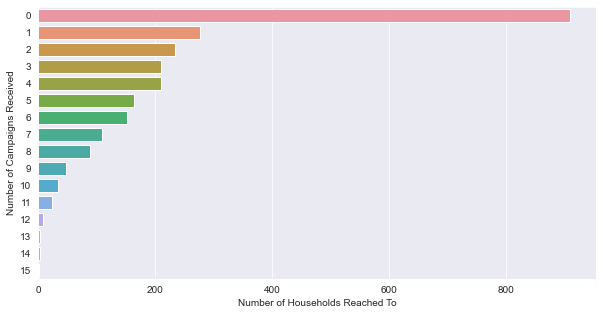

In [22]:
no_of_received_campaigns[0] = total_household_with_no_campaign_received
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns)),columns=["Number of Campaigns Received","Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(10,5))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])

In [23]:
campaigns.campaign_id.value_counts()

18    1133
13    1077
8     1076
27     361
22     276
20     244
14     224
11     214
17     202
7      198
16     188
23     183
9      176
12     170
5      166
19     130
10     123
26     118
4       81
21      65
6       65
2       48
25      17
15      17
1       13
24      12
3       12
Name: campaign_id, dtype: int64

<AxesSubplot:xlabel='Frequency', ylabel='Campaign'>

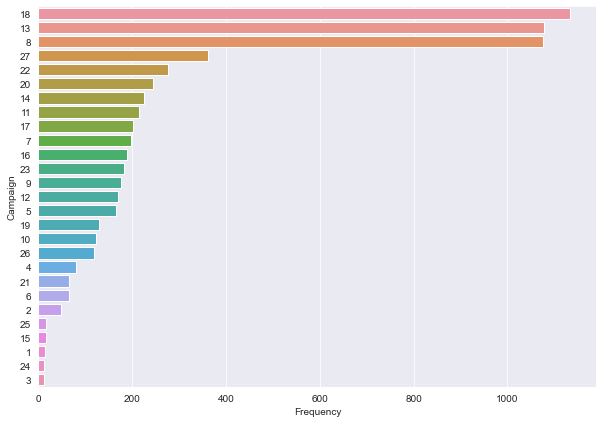

In [24]:
#Graph below gives the most frequent campaigns.
freq_campaigns = pd.DataFrame(list(zip(campaigns.campaign_id.value_counts().index,campaigns.campaign_id.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h",order=freq_campaigns.Campaign)

**inference from Campaign dataset**

1) Out of 2469 households, 1559 (63%) of them received a campaign once, the rest never received a campaign.

2) On the other side, a very small portion of the households received double-digit number of campaigns.

3) Campaign number 18, 13 and 8 being the most frequent ones reaching 1000 and more households each.

**Coupons**

It lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

In [25]:
coupons.head()

,coupon_upc,product_id,campaign_id
0,10000085207,9676830.0,26
1,10000085207,9676943.0,26
2,10000085207,9676944.0,26
3,10000085207,9676947.0,26
4,10000085207,9677008.0,26


In [31]:
#check for duplicate rows if any
len(coupons[coupons.duplicated()])

4872

In [32]:
#remove duplicates
coupons = coupons.drop_duplicates()

In [35]:
#length after removing duplicates
len(coupons)

111332

In [36]:
#info
coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111332 entries, 0 to 116203
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   coupon_upc   111332 non-null  int64  
 1   product_id   111332 non-null  float64
 2   campaign_id  111332 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.4 MB


In [37]:
coupons.coupon_upc.nunique()

981

**findings from coupon dataset**
* total unique coupon codes available at product level is 981

* datset has aprox 4% of the rows which are duplicated, which was removed





**Coupon Redemptions**

this is ordered by household_key, gives which household redeemed what coupon number. Also the date of the redeem and the campaign id is given for each household.


In [40]:
coupon_redemptions.head()

,household_id,coupon_upc,campaign_id,redemption_date
0,1029,51380041013,26,2017-01-01
1,1029,51380041313,26,2017-01-01
2,165,53377610033,26,2017-01-03
3,712,51380041013,26,2017-01-07
4,712,54300016033,26,2017-01-07


In [41]:
coupon_redemptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   household_id     2102 non-null   int64         
 1   coupon_upc       2102 non-null   int64         
 2   campaign_id      2102 non-null   int64         
 3   redemption_date  2102 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 65.8 KB


In [42]:
#number of household redeemed coupons.
print("number of household redeemed coupons",coupon_redemptions.household_id.nunique())
print("%of such household to total household", round(coupon_redemptions.household_id.nunique()/total_household*100,2))

number of household redeemed coupons 410
%of such household to total household 16.61


In [43]:
coupon_redemptions.campaign_id.value_counts()

18    653
13    629
8     372
27     64
17     45
22     43
9      43
16     43
14     34
19     29
12     26
26     22
20     22
10     15
5      13
4      11
11      8
23      8
7       7
2       5
21      3
3       2
15      2
25      1
6       1
1       1
Name: campaign_id, dtype: int64

In [44]:
temp = pd.merge(coupon_redemptions,campaign_descriptions,how = 'left',on = 'campaign_id')

In [45]:
temp.groupby(['campaign_type', 'campaign_id'])['campaign_id'].count()

campaign_type  campaign_id
Type A         8              372
               13             629
               18             653
               27              64
Type B         1                1
               2                5
               4               11
               5               13
               7                7
               9               43
               10              15
               11               8
               12              26
               16              43
               17              45
               19              29
               21               3
               22              43
               23               8
               25               1
               26              22
Type C         3                2
               6                1
               14              34
               15               2
               20              22
Name: campaign_id, dtype: int64

<AxesSubplot:xlabel='No of Redeems', ylabel='Campaign'>

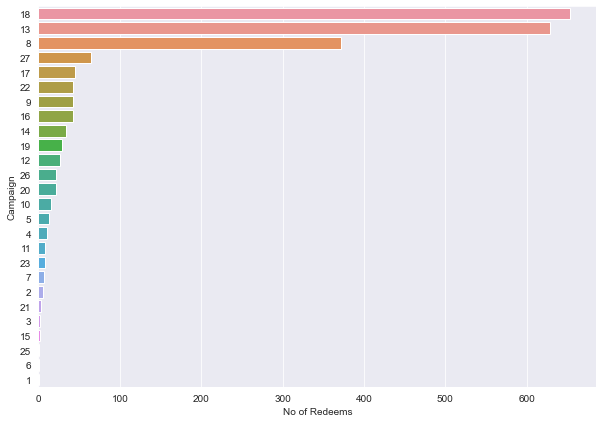

In [46]:
redeem_frequency = pd.DataFrame(list(zip(coupon_redemptions.campaign_id.value_counts().index, coupon_redemptions.campaign_id.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)

<AxesSubplot:xlabel='Redeem_Rate', ylabel='Campaign'>

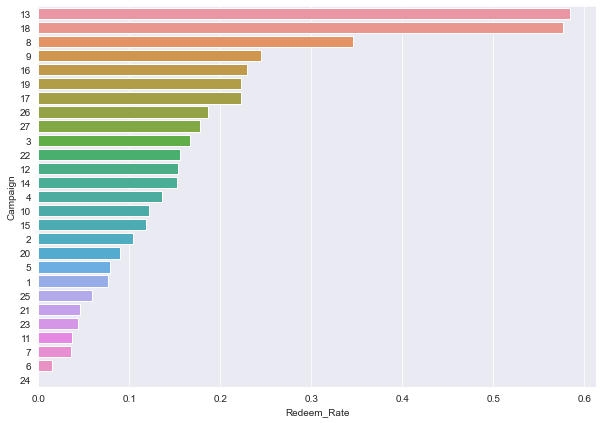

In [47]:
#redeem rates of each campaign in a descending order

redems_per_camp = coupon_redemptions.campaign_id.value_counts().sort_index()/campaigns.campaign_id.value_counts().sort_index()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",order=redems_per_camp.Campaign)

In [48]:
redems_per_camp

,Campaign,Redeem_Rate
12,13,0.584030
17,18,0.576346
7,8,0.345725
8,9,0.244318
15,16,0.228723
18,19,0.223077
16,17,0.222772
25,26,0.186441
26,27,0.177285
2,3,0.166667


**inferences from coupon redemption dataset**

1)number of household redeemed coupons 410 and %of such household to total household 16.61

2)Most frequent campaigns (18, 13 and 8, all belongs to TypeA) attracts the most number of redeems as expected. pls see the barchart which gives the number of redeems per campaign.

3)Campaign 13 and 18 are clearly have higher redeem rates (~60%) as compared to the rest of campaigns. Based on these results, campaign organisers did well by promoting the right campaigns (13 and 18) more frequently.


**Transactional Data**

Transactional data contains purchase history of each household. It contains the product_id and sales value, store_id and all other transactional features.

In [49]:
#converting product id into integer, by default it was a float type
transactions.product_id = transactions.product_id.astype('int64')

In [50]:
transactions.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,transaction_date
0,900,330,3.119857e+10,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01T11:53:26Z,2017-01-01
1,900,330,3.119857e+10,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01T12:10:28Z,2017-01-01
2,1228,406,3.119866e+10,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01T12:26:30Z,2017-01-01
3,906,319,3.119871e+10,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01T12:30:27Z,2017-01-01
4,906,319,3.119871e+10,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01T12:30:27Z,2017-01-01


In [57]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469307 entries, 0 to 1469306
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   household_id           1469307 non-null  int64         
 1   store_id               1469307 non-null  int64         
 2   basket_id              1469307 non-null  float64       
 3   product_id             1469307 non-null  int64         
 4   quantity               1469307 non-null  int64         
 5   sales_value            1469307 non-null  float64       
 6   retail_disc            1469307 non-null  float64       
 7   coupon_disc            1469307 non-null  float64       
 8   coupon_match_disc      1469307 non-null  float64       
 9   week                   1469307 non-null  int64         
 10  transaction_timestamp  1469307 non-null  object        
 11  transaction_date       1469307 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float6

**descriptive study of transactional data**
lets do some descriptive analysis on the transactional data. First, let's group the data by household numbers:

In [56]:
grp_house = transactions[['household_id','quantity','sales_value']].groupby(['household_id']).sum()
grp_house

,quantity,sales_value
household_id,,
1,1131,2415.56
2,406,1024.12
3,7568,1026.63
4,144,442.14
5,95,299.67
...,...,...
2496,72500,2743.84
2497,16540,4190.33
2498,31213,2278.44


In [64]:
#Average amount of purchase by a household within given year:
avg_purchase = round(grp_house.sales_value.mean(),1)
avg_purchase

1861.5

In [65]:
#Average total number of products purchased by a household within given year:
Avg_tot_prod = round(grp_house.quantity.mean(),1)
Avg_tot_prod

61937.3

In [66]:
#Average total number of unique products purchased by a household within given year is:
avg_tot_prod_uni = round(transactions.groupby(['household_id','product_id'])['quantity'].sum().count()/total_household,1)
avg_tot_prod_uni

351.4

In [67]:
#Average number of store visits per household within given year is:
round(len(transactions.groupby(['household_id','transaction_date']).count())/total_household,1)

51.4

In [102]:
#total sales
totalsls = transactions.sales_value.sum()

<AxesSubplot:xlabel='total_sales', ylabel='store_id'>

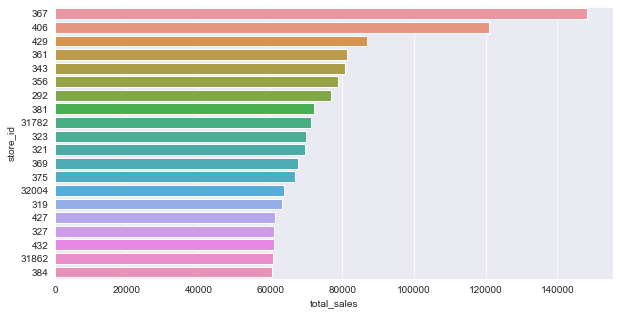

In [68]:
#Top 20 stores based on total sales amount is calculated and plotted below:
sales_per_store = transactions.groupby(["store_id"])["sales_value"].sum().sort_values(ascending=False)

                                                     
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["store_id","total_sales"])
fig_store = plt.figure(figsize=(10,5))

sns.barplot(y="store_id",x="total_sales",data = sales_per_store[:20],order=sales_per_store[:20]["store_id"],orient="h")


In [105]:
#Top 20 stores contr. to total sales in percentage

round(sales_per_store[:20].total_sales.sum()/totalsls*100,1)

33.1

<AxesSubplot:xlabel='Total_purchase', ylabel='household_key'>

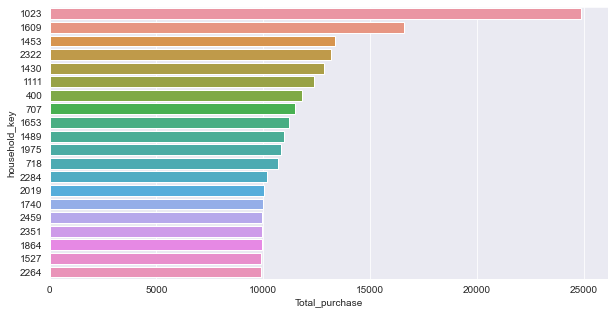

In [69]:
#Top 20 customers based on total purchase amount is calculated and displayed below:
purch_per_cust = transactions.groupby(['household_id'])['sales_value'].sum().sort_values(ascending=False)

purch_per_cust  = pd.DataFrame(list(zip(purch_per_cust.index,purch_per_cust)), columns=["household_key","Total_purchase"])

fig_store = plt.figure(figsize=(10,5))
sns.barplot(y="household_key",x="Total_purchase",data = purch_per_cust[:20],order=purch_per_cust[:20]["household_key"],orient="h")


In [104]:
#Top 20 customers contr. to total sales in percentage

round(purch_per_cust[:20].Total_purchase.sum()/totalsls*100,1)

5.2

<AxesSubplot:xlabel='total_sales', ylabel='product_id'>

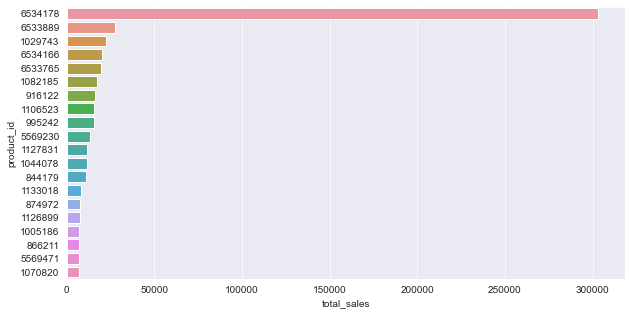

In [71]:
#Top 20 products based on total sales amount is calculated and plotted below:
sales_per_product = transactions.groupby(["product_id"])["sales_value"].sum().sort_values(ascending=False)

                                                     
sales_per_product = pd.DataFrame(list(zip(sales_per_product.index,sales_per_product)),columns=["product_id","total_sales"])
fig_store = plt.figure(figsize=(10,5))

sns.barplot(y="product_id",x="total_sales",data = sales_per_product[:20],order=sales_per_product[:20]["product_id"],orient="h")


In [108]:
#top 20 products and their contr.
totalsls = transactions.sales_value.sum()
top20Product = sales_per_product[:20]
top20Product['contr_to_total%'] = (top20Product.total_sales/totalsls)
top20Product = pd.merge(top20Product,products,how='left',on='product_id')
top20Product

,product_id,total_sales,contr_to_total%,manufacturer_id,department,brand,product_category,product_type,package_size
0,6534178,303116.02,0.065952,69,FUEL,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,NaN
1,6533889,27467.61,0.005976,69,MISCELLANEOUS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,NaN
2,1029743,22729.71,0.004945,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
3,6534166,20477.54,0.004455,69,MISCELLANEOUS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,NaN
4,6533765,19451.66,0.004232,69,FUEL,Private,FUEL,GASOLINE-REG UNLEADED,NaN
5,1082185,17219.59,0.003747,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
6,916122,16120.01,0.003507,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,NaN
7,1106523,15629.95,0.003401,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
8,995242,15602.59,0.003395,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,NaN
9,5569230,13410.46,0.002918,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ


In [107]:
#top 20 products contr. to total sales
sales_per_product[:20].total_sales.sum()/totalsls

0.12148171926752738

In [112]:
#top 20 products in product number contributes to total unique products
20/(transactions.product_id.nunique())*100

0.02919324468318031

In [96]:
#also checking top 20% product contr. to sales
round(transactions.product_id.nunique()*0.2,0)

13702.0

In [99]:
#top20_percent_Product
print("top 20 percent product contr.",round(sales_per_product[:13702].total_sales.sum()/totalsls*100,0),"% to total sales")

top 20 percent product contr. 84.0 % to total sales


**inferences from transcational data**

* Average amount of purchase by a household within these given timeframe is:1861.5

* Average total number of products purchased by a household within given timeframe is:61937.3

* Average total number of unique products purchased by a household within given timeframe is:351.4

* Average number of store visits per household within given timeframe is: 51.4

* Top 20 stores contr. 33%  to total sales. Stores with IDs of 367 and 406 made the most sales amongst 582 stores with over 120,000 value each.

* Top 20 customers contr. 5%  to total sales.Top customer is with the ID of 1023 who made the most purchases amongst 2500 house holds with almost 25,000.

* Top 20 products (which is less than 0.03% to total products traded) contr. 12% to total sales. product id  

* top 20% products contr. 84% to total sales, which estabilish the pareto principle (80-20 rule) also.

* product id'6534178' is the top most product which contr.6.5% to total sales and belongs to 'FUEL' department and product category'COUPON/MISC ITEMS'

* for selecting right campaign/loyalty program, these top attributing customers/store locations/products should be in high focus.




**product table**

In [114]:
products.head()

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
0,25671.0,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081.0,2,MISCELLANEOUS,National,NaN,NaN,NaN
2,26093.0,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,NaN
3,26190.0,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355.0,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [116]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92331 entries, 0 to 92330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        92331 non-null  float64
 1   manufacturer_id   92331 non-null  int64  
 2   department        92331 non-null  object 
 3   brand             92331 non-null  object 
 4   product_category  91791 non-null  object 
 5   product_type      91803 non-null  object 
 6   package_size      61745 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.9+ MB


**Product data limitations:**

post carefully examination of top selling product IDs mapping to product categories in the inferences in transaction datasets, we found various product id's have similar product type, however mappped to different departments and product categories. It's difficult to use the product dataset for our analysis without knowing business fields of product table in-depth and correctly, which is only possible by discussing with the given supermarket business team 

**Demographics Data**

Demographics data contains the household demographical information like age group, marital status and househols size..etc. We will be using this table as a base and add few columns post feature engineering. 

In [117]:
demographics.head()

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
2,1003,35-44,25-34K,NaN,Unmarried,1,1 Adult No Kids,0
3,1004,25-34,15-24K,NaN,Unmarried,1,1 Adult No Kids,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2


In [118]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   household_id    801 non-null    int64 
 1   age             801 non-null    object
 2   income          801 non-null    object
 3   home_ownership  568 non-null    object
 4   marital_status  664 non-null    object
 5   household_size  801 non-null    object
 6   household_comp  801 non-null    object
 7   kids_count      801 non-null    object
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


marital status and home_ownnership has null values , which can be either made '0' or 'unknown' for our analysis purpose.

Lets first start defining the functions for exploratory analysis of demographic variables:

In [119]:
def pie_categorical(data):
    #function to plot the histogram of categorical variables in pie graph
    features = data.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

def hist_numeric(data):
    #function to plot the histogram of numeric variables
    features = data.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        data[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

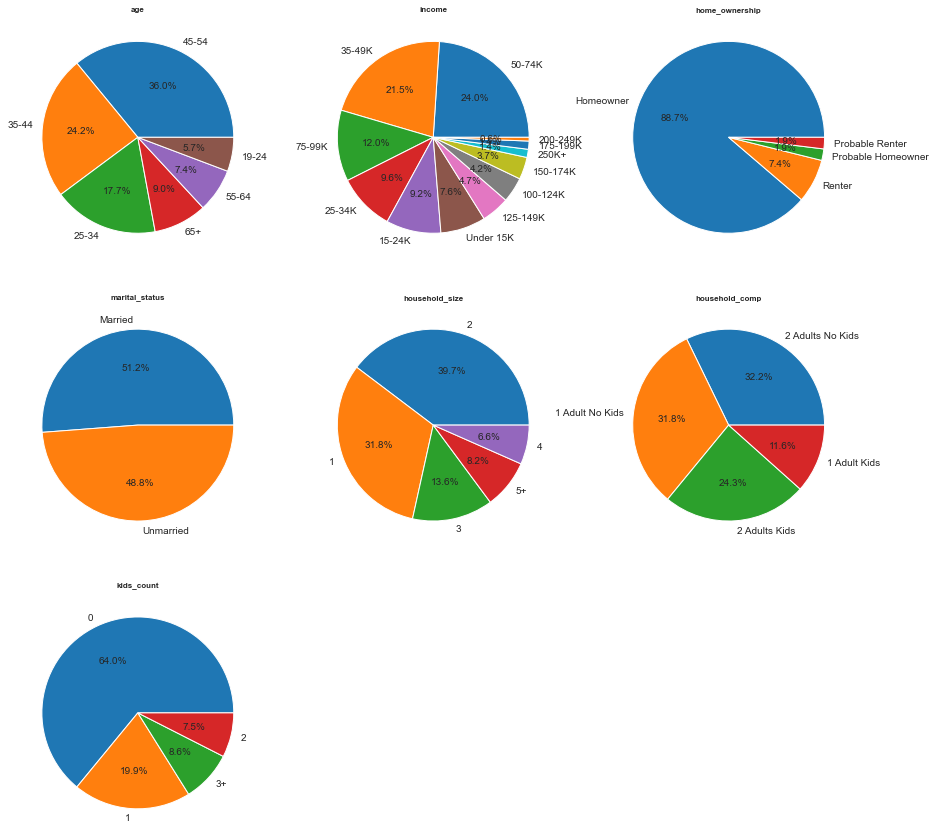

In [49]:
pie_categorical(demographics.drop("household_id",axis=1))

**inferences from demographic dataset**
Since all variables are categorical in the demographics dataset, we will use our _piecategorical function. from above piechart, below is the distribution of each categorical variable in the demographics dataset.

Some interesting findings:

Majority of the customers age in between 45-54 (aprox 36%) and broadly 35-54 (aprox 60%)

Married couples proportion is slightly more than the singles

close to half of the population have a salary between $35-74K

Majority of the customers own a house (89%). this is post excluding null values.

Majority of the customers does not have a child (~64%)


#### Feature Engineering

* loyal customers (or most frequent visitor) basis on weekly visit to supermarket

In [120]:
#weekly customer purchase amount
weekly_purchase = transactions.groupby(["household_id","week"]).sum()["sales_value"]
weekly_purchase = weekly_purchase.unstack()

target = []
target1= []
common_houses = set(demographics.household_id) & set(transactions.household_id)
for house in common_houses:
  target.append(weekly_purchase.loc[house].dropna().count())
  target1.append(weekly_purchase.loc[house].dropna().index[-1])


target = pd.DataFrame(list(zip(common_houses,target, target1)),columns=["household_key","No. of visit week","last week visited"]).sort_values(by='household_key')

In [121]:
target.tail()

,household_key,No. of visit week,last week visited
305,2494,19,53
306,2496,32,51
307,2497,50,53
308,2498,47,53
309,2499,28,52


In [122]:
target['shopped_in_last4wks'] = target['last week visited'].apply(lambda x: 1 if(x in [50,51,52,53]) else 0)

In [123]:
"""loyal customer based on 3 week out of 4 week visits and also should not churn in last month, means visited atleast once in last weeks (30,51,52,53)"""
#have not taken total daily visits, to avoid outliers and sudden spikes
target['avg_weekly_visits'] = target['No. of visit week']/53
target['temp'] = (target['avg_weekly_visits'])*(target['shopped_in_last4wks'])
target['loyal_customer'] = target['temp'].apply(lambda x:True if(x>=0.75) else False)
target = target.drop('temp', axis=1)
#avg weekly visits are avg number of weeks visits per month at annually avg

In [124]:
target.head()

,household_key,No. of visit week,last week visited,shopped_in_last4wks,avg_weekly_visits,loyal_customer
0,1,39,53,1,0.735849,False
3,7,29,53,1,0.547170,False
4,8,40,53,1,0.754717,True
7,13,51,53,1,0.962264,True
10,16,30,53,1,0.566038,False


Text(0.5, 1.0, 'loyal customer Variable Distribution')

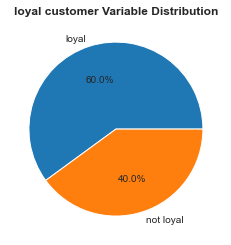

In [125]:
target.loyal_customer.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["loyal","not loyal"])
plt.ylabel("")
plt.title("loyal customer Variable Distribution",fontweight="bold")

In [126]:
Loyal_customer = target[['household_key','loyal_customer']]
Loyal_customer

,household_key,loyal_customer
0,1,False
3,7,False
4,8,True
7,13,True
10,16,False
...,...,...
305,2494,False
306,2496,False
307,2497,True
308,2498,True


*  List of campaigns received by each household:

In [135]:
household_per_campaign = campaigns.groupby("campaign_id")["household_id"].apply(list)

In [136]:
household_per_campaign

campaign_id
1     [105, 1238, 1258, 1483, 2200, 293, 529, 536, 5...
2     [1055, 1060, 1117, 1299, 1316, 1336, 1353, 141...
3     [1130, 1590, 1633, 1828, 1917, 2305, 2427, 676...
4     [104, 1055, 1081, 1094, 113, 1158, 1159, 1166,...
5     [1029, 1056, 1069, 1071, 108, 1084, 1087, 1104...
6     [1015, 1070, 1078, 113, 1166, 1216, 1247, 1272...
7     [1004, 1016, 1029, 1032, 1040, 1046, 1053, 105...
8     [1, 1000, 1004, 1005, 1007, 101, 1011, 1012, 1...
9     [1004, 1011, 1029, 1032, 104, 1040, 1053, 1057...
10    [1025, 1041, 1069, 108, 1111, 1113, 1128, 1131...
11    [101, 1025, 104, 1041, 1045, 105, 1074, 1078, ...
12    [1, 1014, 1020, 1029, 1039, 1056, 1069, 1094, ...
13    [1, 1000, 1004, 1005, 1007, 101, 1011, 1012, 1...
14    [1024, 104, 1042, 1050, 1056, 1078, 1081, 1094...
15    [1017, 1082, 1103, 143, 1803, 1820, 1914, 2134...
16    [1016, 1029, 1064, 1070, 1085, 1091, 1103, 111...
17    [1001, 1029, 104, 1041, 1045, 1056, 1060, 1061...
18    [1, 1000, 1001, 1004, 1005, 10

In [137]:
total_campaigns = len(campaigns.campaign_id.unique())
total_campaigns

27

In [138]:
campaigns.household_id.max()

2500

In [139]:
df_camp = pd.DataFrame(np.full((campaigns.household_id.max(),total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],index=range(1,campaigns.household_id.max()+1))

In [140]:
df_camp

,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,...,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1
df_camp["household_id"] = df_camp.index

In [142]:
df_camp.tail()

,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,...,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,household_id
2496,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2496
2497,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2497
2498,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2498
2499,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2499
2500,0,0,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,2500


In [143]:
len(df_camp)

2500

In [145]:
#household key from transaction list - making a dataframe
h1 = transactions.household_id.unique().tolist()
df_camp['check_household'] = df_camp.household_id.apply(lambda x: True if (x in h1 ) else False)

In [146]:
df_camp = df_camp[df_camp.check_household==True]
df_camp = df_camp.drop('check_household',1)

In [147]:
len(df_camp)

2469

* Total number of received campaigns per household:

In [148]:
#
temp = campaigns.household_id.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_received_campaigns"])

**correlation between numer of campaign received by household and a household's purchase behaviour**


The correlation between the number of campaigns received by a household and their total purchase amount is visualised in a scatter plot below. Linear line in the graph shows the regression model fitted to the scattered data. we can say the  variables are linearly related.


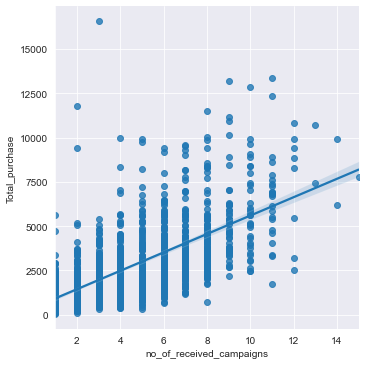

In [149]:
no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purch_per_cust,on="household_key")
sns.lmplot(x="no_of_received_campaigns",y="Total_purchase",data=no_of_received_campaigns_vs_sumsales)

In [150]:
no_of_received_campaigns_vs_sumsales.drop("household_key",axis=1).corr()

,no_of_received_campaigns,Total_purchase
no_of_received_campaigns,1.000000,0.671353
Total_purchase,0.671353,1.000000


**findings:**

The scatter plot and the correlation value above (67%) indicates that the total purchase amount of a household is positively correlated to the number of campaigns received by them.

* feature: List of campaigns resulted in coupon redemption:


In [151]:
temp = coupon_redemptions.groupby("household_id")["campaign_id"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),columns=["household_key","redeemed_CAMPAIGN_list"])

In [152]:
rede_camp_history_per_household.head()

,household_key,redeemed_CAMPAIGN_list
0,1,"[8, 8, 8, 18, 18]"
1,8,[8]
2,13,"[5, 8, 8, 8, 11, 10, 13, 11, 13, 13, 13, 18, 1..."
3,14,"[13, 13, 13]"
4,18,"[8, 8, 13, 13, 13, 18, 18, 18]"


* Feature: The number of redemptions made by each household:

In [153]:
temp = coupon_redemptions.household_id.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_redeems"])

* Feature: Most Frequent Campaign Type (A,B,C) received by each household:

In [154]:

camp_list = pd.merge(campaigns,campaign_descriptions, how = 'left', on = 'campaign_id').groupby("household_id")["campaign_type"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,[pd.Series(i).value_counts().idxmax() for i in camp_list])),columns=["household_key","most_freq_camp_type"])

In [155]:
df_camp.head()

,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,...,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,household_id
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [156]:
most_freq_type

,household_key,most_freq_camp_type
0,1,Type B
1,2,Type A
2,3,Type A
3,4,Type A
4,6,Type A
...,...,...
1554,2496,Type A
1555,2497,Type A
1556,2498,Type A
1557,2499,Type A


* Feature: Amount of purchase of a household within given time frame:....already created earlier

* Feature 8: basket size (UPT: unit per transaction), ATV(avg transaction value), No of transactions

In [159]:
transactions.groupby(['household_id','basket_id'])['quantity'].sum()

household_id  basket_id   
1             3.131705e+10    40
              3.142426e+10    22
              3.162490e+10    37
              3.172328e+10    11
              3.181876e+10    29
                              ..
2500          4.129743e+10    10
              4.132452e+10    19
              4.140045e+10    11
              4.145310e+10    15
              4.145310e+10     3
Name: quantity, Length: 155848, dtype: int64

In [160]:
number_of_invoices = transactions.groupby('household_id')['basket_id'].nunique().sort_index()
sales_per_cust = transactions.groupby('household_id')['sales_value'].sum().sort_index()
unit_per_cust = transactions.groupby('household_id')['quantity'].sum().sort_index()

customer_transaction_data = pd.DataFrame(list(zip(number_of_invoices.index,number_of_invoices,sales_per_cust,unit_per_cust)),columns=["household_key","cust_invoice_count","cust_sales_val","cust_sls_unit"])
                                                      

In [161]:
customer_transaction_data['UPT'] =round(customer_transaction_data['cust_sls_unit']/customer_transaction_data['cust_invoice_count'],1)

In [162]:
customer_transaction_data['ATV'] = round(customer_transaction_data['cust_sales_val']/customer_transaction_data['cust_invoice_count'],1)

In [163]:
customer_transaction_data = customer_transaction_data[['household_key','cust_invoice_count','UPT','ATV']]
customer_transaction_data.head()

,household_key,cust_invoice_count,UPT,ATV
0,1,51,22.2,47.4
1,2,20,20.3,51.2
2,3,20,378.4,51.3
3,4,18,8.0,24.6
4,5,20,4.8,15.0


* Feature: Top 20 stores with high number of households which have more visits:

In [164]:
pd.merge(demographics,df_camp,on="household_id",how="left")

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,...,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,...,1,0,1,0,1,1,0,0,1,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1003,35-44,25-34K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1004,25-34,15-24K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,986,25-34,35-49K,NaN,Unmarried,1,1 Adult No Kids,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,992,45-54,35-49K,Homeowner,Married,3,2 Adults Kids,1,0,0,...,0,0,0,0,0,0,0,0,0,0
798,993,55-64,50-74K,Homeowner,Married,5+,1 Adult Kids,3+,0,0,...,1,0,0,0,0,1,0,0,1,0
799,996,55-64,25-34K,Homeowner,Married,2,2 Adults No Kids,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [165]:
freq_visit_stores = transactions.groupby('store_id')['basket_id'].nunique().sort_values(ascending=False)[:20].reset_index().drop('basket_id',axis=1)

In [166]:
freq_visit_stores['stores'] = freq_visit_stores['store_id'].apply(lambda x: "store_"+str(x))

In [168]:
freq_visit_stores.head()

,store_id,stores
0,367,store_367
1,406,store_406
2,343,store_343
3,361,store_361
4,381,store_381


In [169]:
trasaction_temp_data = pd.merge(freq_visit_stores,transactions,how='left',on='store_id')

trasaction_temp_data1 = pd.pivot_table(trasaction_temp_data, values = 'basket_id', index='household_id', columns='stores', aggfunc=pd.Series.nunique).fillna(0)

In [170]:
trasaction_temp_data1

stores,store_292,store_31782,store_318,store_31862,store_319,store_32004,store_321,store_323,store_330,store_343,store_356,store_361,store_367,store_369,store_375,store_381,store_406,store_410,store_422,store_429
household_id,,,,,,,,,,,,,,,,,,,,
2,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
trasaction_temp_data1.reset_index().household_id

0          2
1          3
2          4
3          6
4          8
        ... 
1518    2494
1519    2497
1520    2498
1521    2499
1522    2500
Name: household_id, Length: 1523, dtype: int64

In [172]:
new_df = pd.DataFrame(np.where(trasaction_temp_data1.T == trasaction_temp_data1.T.max(), 1, 0),index=trasaction_temp_data1.columns).T

In [173]:
#top 20 stores based on highest invoices (number of visits or invoices) at household level
df_store = pd.merge(new_df,trasaction_temp_data1.reset_index().household_id, left_index=True, right_index=True)
df_store = df_store.rename(columns={"household_id":"household_key"})
df_store.head()

,store_292,store_31782,store_318,store_31862,store_319,store_32004,store_321,store_323,store_330,store_343,...,store_361,store_367,store_369,store_375,store_381,store_406,store_410,store_422,store_429,household_key
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8


**Generate the final dataframe to be used for segmentation and inference learning**

In [176]:
#merging created features with base table demographic.
data = pd.merge(demographics,df_camp,on="household_id",how="left")
data = data.rename(columns={"household_id":"household_key"})

data1 = pd.merge(data,no_of_received_campaigns,on="household_key",how="left")

data2 = pd.merge(data1,df_store,on="household_key",how="left")

data3 = pd.merge(data2,no_of_rede_per_household,on="household_key",how="left")

data4 = pd.merge(data3,most_freq_type,on="household_key",how="left")

data5 = pd.merge(data4,purch_per_cust,on="household_key",how="left")

data6 = pd.merge(data5,customer_transaction_data,on="household_key",how="left")

data6_1 = pd.merge(data6,Loyal_customer,on="household_key",how="left")

data7 = data6_1.fillna(0) #Change NaN or None/Unknown values to zero for the columns

#Change other object type elements in the columns to integer for modeling purpose

data7.no_of_received_campaigns = data7.no_of_received_campaigns.astype(int)
data7.kids_count.replace(["3+"],[3],inplace=True)
data7.kids_count = data7.kids_count.astype(int)
data7.household_size.replace("5+",5,inplace=True)
data7.household_size = data7.household_size.astype(int)

# I have given separate name to each dataset (refer rows above) for easy tweaking if required later

In [177]:
data7.head()

,household_key,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,...,store_410,store_422,store_429,no_of_redeems,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,loyal_customer
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,...,0.0,0.0,0.0,5.0,Type B,2415.56,51,22.2,47.4,False
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,0.0,Type A,2558.82,46,23.7,55.6,False
2,1003,35-44,25-34K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,0.0,Type A,1404.43,32,21.1,43.9,False
3,1004,25-34,15-24K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,0.0,Type A,2486.93,168,1959.7,14.8,True
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,...,0.0,0.0,0.0,5.0,Type A,4483.35,145,1655.0,30.9,True


In [178]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   household_key             801 non-null    int64  
 1   age                       801 non-null    object 
 2   income                    801 non-null    object 
 3   home_ownership            801 non-null    object 
 4   marital_status            801 non-null    object 
 5   household_size            801 non-null    int32  
 6   household_comp            801 non-null    object 
 7   kids_count                801 non-null    int32  
 8   Camp_1                    801 non-null    int32  
 9   Camp_2                    801 non-null    int32  
 10  Camp_3                    801 non-null    int32  
 11  Camp_4                    801 non-null    int32  
 12  Camp_5                    801 non-null    int32  
 13  Camp_6                    801 non-null    int32  
 14  Camp_7    

* creating one more feature for high-low spending based on 80/20 rule and then creating spend and loyalty matrix labels

This is to understand the behaviour of customers profile in relation with:

1) how much they spend (share of wallet)

2) and Tenure (how long they stay & how frequenty they shop from us)

3) long term loyalty (share of wallet and frequency)

In [180]:
#Also creating a feature of high-low transaction value by customer
abc = data7[['household_key','Total_purchase']].sort_values(by='Total_purchase', ascending = False)

abc["cumpercentage"] = round(abc["Total_purchase"].cumsum()/abc["Total_purchase"].sum()*100,1)

abc['spending_val_category'] = abc["cumpercentage"].apply(lambda x: "High" if x<=80 else "Low")


In [181]:
abc = abc[['household_key','spending_val_category']]
abc

,household_key,spending_val_category
205,1609,High
152,1453,High
462,2322,High
145,1430,High
580,400,High
...,...,...
797,992,Low
144,1429,Low
229,1695,Low
605,460,Low


In [182]:
#combining with dataset data7
data7 = pd.merge(data7,abc,on="household_key",how="left")
data7.head()

,household_key,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,...,store_422,store_429,no_of_redeems,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,loyal_customer,spending_val_category
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,...,0.0,0.0,5.0,Type B,2415.56,51,22.2,47.4,False,High
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,Type A,2558.82,46,23.7,55.6,False,High
2,1003,35-44,25-34K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,Type A,1404.43,32,21.1,43.9,False,Low
3,1004,25-34,15-24K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,0.0,0.0,0.0,Type A,2486.93,168,1959.7,14.8,True,High
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,...,0.0,0.0,5.0,Type A,4483.35,145,1655.0,30.9,True,High


In [184]:
#feature for premium loyalty (for case study purpouse, here defined as loyalty + high spending)
data7['Premium_loyalty'] = (data7['spending_val_category'].apply(lambda x:True if (x =="High") else False)) & (data7.loyal_customer)

In [185]:
data7['target'] = (data7['spending_val_category'].apply(lambda x: x+str("_spending_"))) + (data7['loyal_customer'].apply(lambda x: "loyal" if x==True else "Notloyal"))
data7['target'].head()

0    High_spending_Notloyal
1    High_spending_Notloyal
2     Low_spending_Notloyal
3       High_spending_loyal
4       High_spending_loyal
Name: target, dtype: object

**Behavioural study of customers on basis who they are (demography) and what they do( spending, loyalty, basket size/UPT..etc)**

**impact of age of customers on loyalty, spending and premium loyalty (as defined earlier)**

* Households with the age of 55-64 tend to more loyal then the rest of other age groups

* No monotonic increase or decrease observed with age

* Loyal customer tends to spend much more than non loyal customer

* age 35-44 had high premium loyalty (high spending & frequency of shopping)



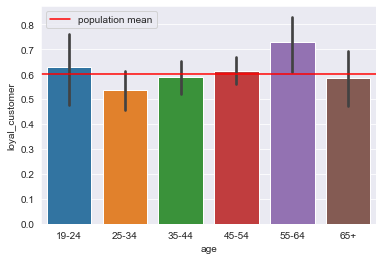

In [187]:
ax = sns.barplot(x="age",y="loyal_customer",data=data7,order=["19-24","25-34","35-44","45-54","55-64","65+"])
ax.axhline(y=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend();

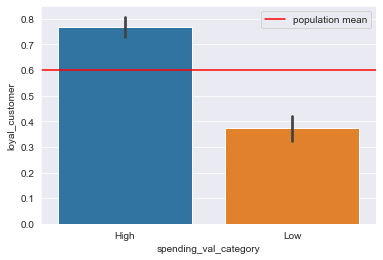

In [189]:
#also check among high spending
ax = sns.barplot(x="spending_val_category",y="loyal_customer",data=data7,order=["High","Low"])
ax.axhline(y=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

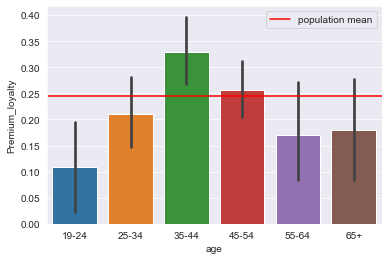

In [491]:
#premim loyalty and age
ax = sns.barplot(x="age",y="Premium_loyalty",data=data7,order=["19-24","25-34","35-44","45-54","55-64","65+"])
ax.axhline(y=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Marital status of customers  vs loyal customer and premium loyalty**

Unmarried couples tend to be slighly more loyal compared to married people

married couple have slighly high premium loyalty compare to unmarried couples

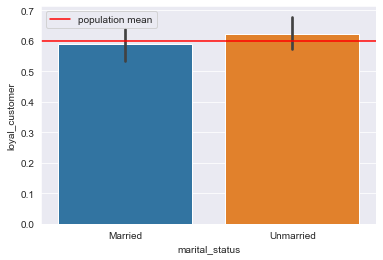

In [190]:
ax = sns.barplot(x="marital_status",y="loyal_customer",data=data7,order=["Married","Unmarried"])
ax.axhline(y=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

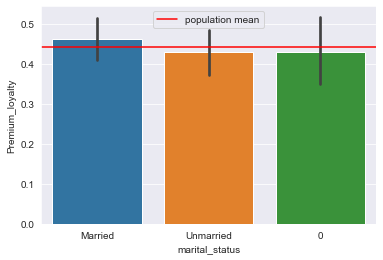

In [191]:

ax = sns.barplot(x="marital_status",y="Premium_loyalty",data=data7,order=["Married","Unmarried",0])
ax.axhline(y=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Income vs loyal customer and premium loyalty**

250K+ income group is highly loyal and higher spender.

200-249K group is however less loyal to the business, need to given special attention to make them loyal customers.


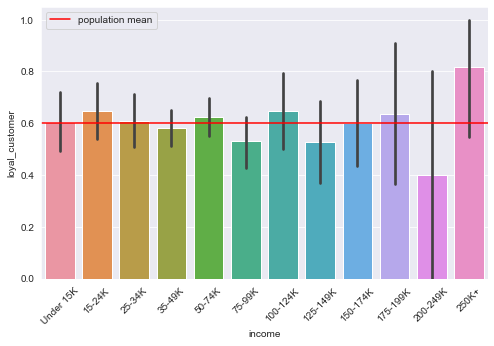

In [192]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="income",y="loyal_customer",data=data7,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

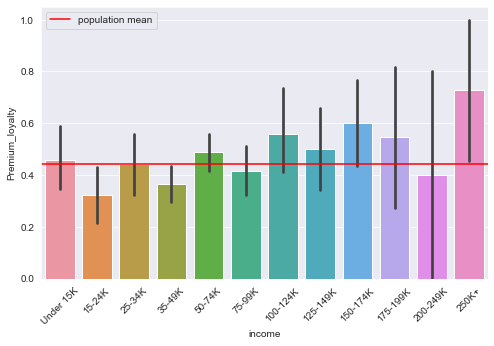

In [193]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="income",y="Premium_loyalty",data=data7,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Home Ownership vs loyal customer and premium loyalty**


renter and probable homeowner have more tendency to be loyal. 

renter's customers are premium loyal customer to the business

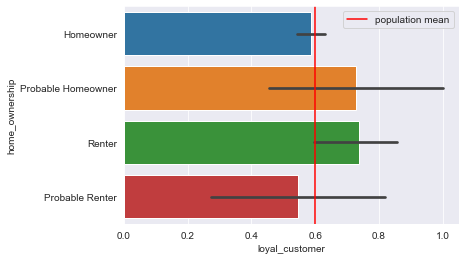

In [198]:
ax = sns.barplot(y="home_ownership",x="loyal_customer",data=data7,orient="h", order=["Homeowner","Probable Homeowner","Renter","Probable Renter"])
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

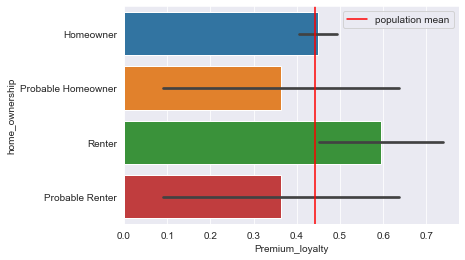

In [199]:
ax = sns.barplot(y="home_ownership",x="Premium_loyalty",data=data7,orient="h",  order=["Homeowner","Probable Homeowner","Renter","Probable Renter"])
ax.axvline(x=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Number of Reedems vs loyal customer and premium loyalty**


Lets group our data based on household's number of redeems. will use pandas.cut which groups the number of redeems into the bins. 

Graph below separates 0 redeemers, redeemed once and the final group redeemed more than once:

Loyal customer and spending increases as the number of redeems increase

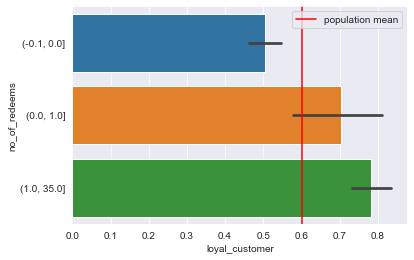

In [200]:
ax = sns.barplot(y=pd.cut(data7.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="loyal_customer",data=data7,orient="h")
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

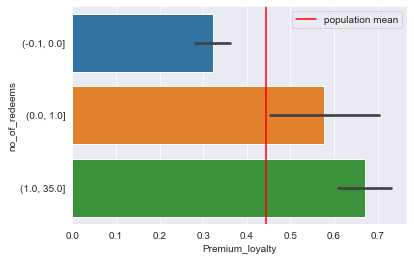

In [201]:
ax = sns.barplot(y=pd.cut(data7.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="Premium_loyalty",data=data7,orient="h")
ax.axvline(x=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Number of campaigns received by a household vs loyal customer**


Loyal customer tendency increases as the number of campaigns received by a household increases

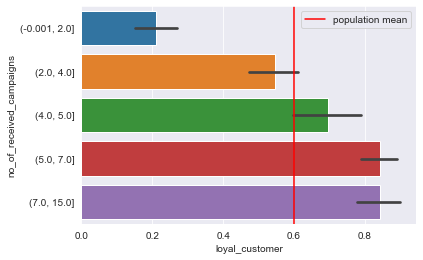

In [202]:
ax = sns.barplot(y=pd.qcut(data7.no_of_received_campaigns,5,duplicates="drop"),x="loyal_customer",data=data7,orient="h")
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

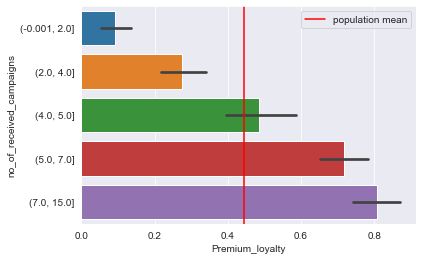

In [203]:
ax = sns.barplot(y=pd.qcut(data7.no_of_received_campaigns,5,duplicates="drop"),x="Premium_loyalty",data=data7,orient="h")
ax.axvline(x=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**household_comp vs loyal customer**

slighly more loyal customer tendecy when no kids in data, but premium loyalty when 2 adults and kids profile.

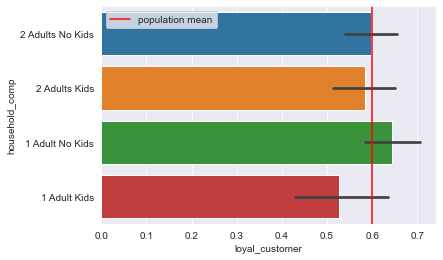

In [205]:
ax = sns.barplot(y="household_comp",x="loyal_customer",data=data7,orient="h",order=['2 Adults No Kids','2 Adults Kids','1 Adult No Kids','1 Adult Kids'])
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

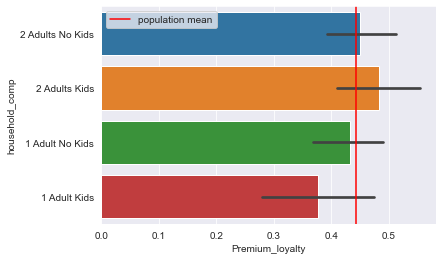

In [206]:
ax = sns.barplot(y="household_comp",x="Premium_loyalty",data=data7,orient="h",order=['2 Adults No Kids','2 Adults Kids','1 Adult No Kids','1 Adult Kids'])
ax.axvline(x=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

**household_size vs loyal customer**

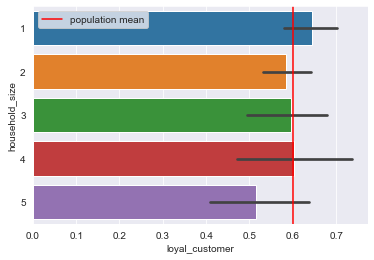

In [207]:


ax = sns.barplot(y="household_size",x="loyal_customer",data=data7,orient="h")
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

**campaign type vs loyal customer**

TypeC campaign didn't work as all households which was approached with campaign C have less visits/not loyal customers . 

TypeB was the most successful

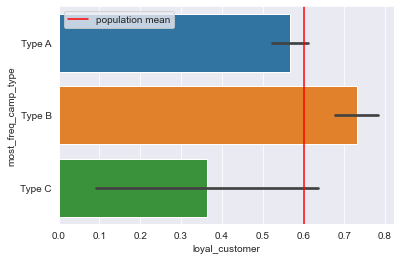

In [209]:
ax = sns.barplot(y="most_freq_camp_type",x="loyal_customer",data=data7,orient="h",order=['Type A','Type B','Type C'])
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

**Basket Size vs loyal customer**



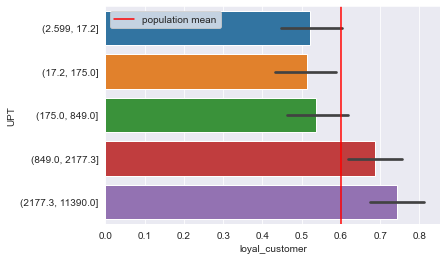

In [210]:
ax = sns.barplot(y=pd.qcut(data7["UPT"],5,duplicates="drop"),x="loyal_customer",data=data7,orient="h")
ax.axvline(x=data7.loyal_customer.sum()/len(data7),c="red",label="population mean")
ax.legend()

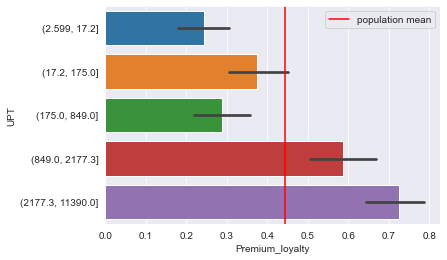

In [211]:
ax = sns.barplot(y=pd.qcut(data7["UPT"],5,duplicates="drop"),x="Premium_loyalty",data=data7,orient="h")
ax.axvline(x=data7.Premium_loyalty.sum()/len(data7),c="red",label="population mean")
ax.legend()

Correlation between Campaign Number and the loyal_customer are calculated and displayed below:

Campaign 13 as a feature expected to be performing well  as it has the highest correlation with the given variable

<AxesSubplot:xlabel='Correlation with Target', ylabel='Campaign No.'>

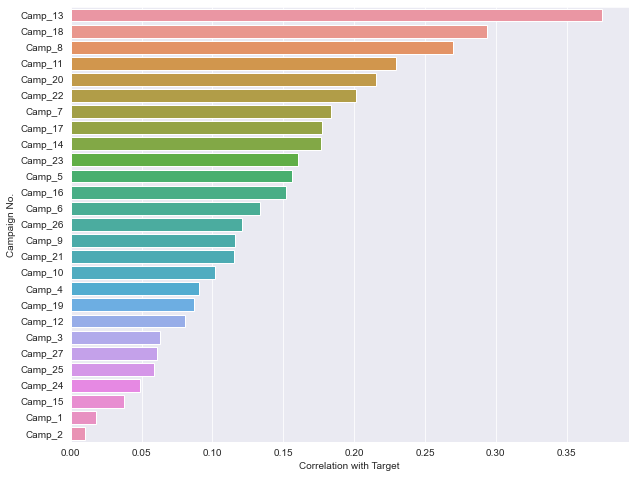

In [215]:
corrs = abs(data7[["Camp_"+str(i) if i<28 else "loyal_customer" for i in range(1,29)]].corr()["loyal_customer"])
corrs.drop("loyal_customer",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Campaign No.","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,8))
sns.barplot(y="Campaign No.",x="Correlation with Target",data = corrs,orient="h")

#Correlation between the stores with high number of loyal customers are calculated and displayed in the barchart below:


In [216]:
cols = list(df_store.columns)
cols.extend(["loyal_customer"])
corrs = abs(data7[cols].corr()["loyal_customer"])
corrs.drop("loyal_customer",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["store_id","Correlation_with_Target"]).sort_values(by="Correlation_with_Target",ascending=False)
fig_store = plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Correlation_with_Target', ylabel='store_id'>

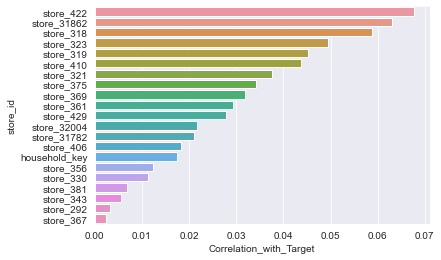

In [217]:
sns.barplot(x = "Correlation_with_Target", y="store_id", data = corrs, orient = "h")

**Supervised Modelling:**

Customer segmentation targeting primarly what they do - long term loyalty (share of wallet & tenure/frequency of visit),labelled here as:

1. High_spending_loyal
2. Low_spending_loyal
3. High_spending_Notloyal
4. Low_spending_Notloyal

this will be helpful in carefully crafting loyalty program, also to segment the new customer in these labelled bucket basis on the similar attributes as per the model


In [229]:
#dropping the repeated info columns, household key, also home_ownership column due to high null values
final_data = data7.drop(columns=["loyal_customer","spending_val_category", "Premium_loyalty","household_key", "home_ownership"])

In [230]:
final_data.head()

,age,income,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,Camp_4,...,store_410,store_422,store_429,no_of_redeems,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,target
0,65+,35-49K,Married,2,2 Adults No Kids,0,0,0,0,0,...,0.0,0.0,0.0,5.0,Type B,2415.56,51,22.2,47.4,High_spending_Notloyal
1,45-54,50-74K,Unmarried,1,1 Adult No Kids,0,0,0,0,0,...,0.0,0.0,0.0,0.0,Type A,2558.82,46,23.7,55.6,High_spending_Notloyal
2,35-44,25-34K,Unmarried,1,1 Adult No Kids,0,0,0,0,0,...,0.0,0.0,0.0,0.0,Type A,1404.43,32,21.1,43.9,Low_spending_Notloyal
3,25-34,15-24K,Unmarried,1,1 Adult No Kids,0,0,0,0,0,...,0.0,0.0,0.0,0.0,Type A,2486.93,168,1959.7,14.8,High_spending_loyal
4,45-54,Under 15K,Married,4,2 Adults Kids,2,0,0,0,0,...,0.0,0.0,0.0,5.0,Type A,4483.35,145,1655.0,30.9,High_spending_loyal


In [231]:
features = final_data.drop(columns="target")

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

#one hot encoding categorical data for modelling
encoded = pd.get_dummies(features[features.columns[features.dtypes==object]])
data_encoded = pd.concat([encoded, features[features.columns[features.dtypes != object]]],axis=1)

#Features (X) and the target (y)
X = data_encoded
y = final_data.target

#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

[22:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

We first transformed our categorical variables using one-hot encoding algorithm (get_dummies) to be able to use in our classifier. Then separated the data into train and test 75%/25%. Then generated an XGBoost classifier with it's default parameters and trained it with the training set.

Now let's test our trained classifier with test data:

Train Data Classification Report:

                        precision    recall  f1-score   support

High_spending_Notloyal       1.00      1.00      1.00        81
   High_spending_loyal       1.00      1.00      1.00       268
 Low_spending_Notloyal       1.00      1.00      1.00       161
    Low_spending_loyal       1.00      1.00      1.00        90

              accuracy                           1.00       600
             macro avg       1.00      1.00      1.00       600
          weighted avg       1.00      1.00      1.00       600

Test Data Classification Report:

                        precision    recall  f1-score   support

High_spending_Notloyal       0.88      0.85      0.86        26
   High_spending_loyal       0.95      0.97      0.96        87
 Low_spending_Notloyal       0.85      0.87      0.86        52
    Low_spending_loyal       0.80      0.78      0.79        36

              accuracy                           0.89       201
             macro avg       0

[Text(0.5, 16.0, 'predicted values'),
 Text(33.99999999999999, 0.5, 'real values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

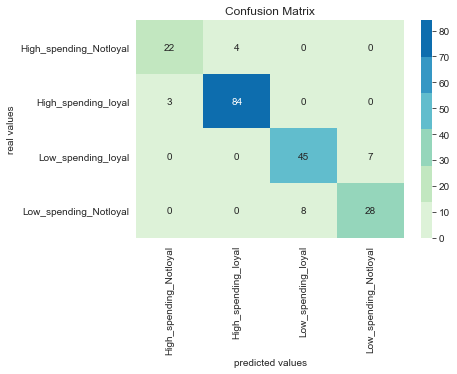

In [235]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [236]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test, y_pred)

0.9133109233328024

#not further of tuning the hyperparameter in this case since our confusion matrix and multiclas roc auc score is matching the objectives with default params

checking for parameters were more important to separate our labels. The barchart below list the features ordered by their importance values for the XGB Classifier.

As expected, "Total Purchase", "cust_invoice_count", "camp_16 & "camp_13'" are the most important features for the classifier. which is also correlated with our feature engineering analysis.

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

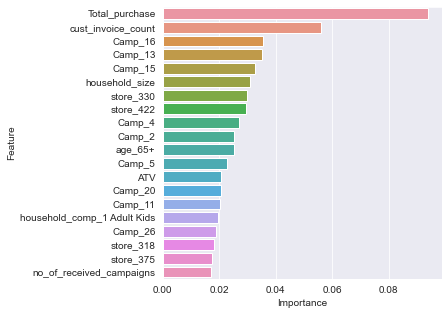

In [241]:
#top 20 important fearures
feat_imp = pd.DataFrame(list(zip(data_encoded.columns,xgb_mdl.feature_importances_)),columns=["Feature","Importance"]).sort_values(by="Importance",ascending=False)
fig_store = plt.figure(figsize=(5,5))
sns.barplot(y="Feature",x="Importance",data = feat_imp[:20],orient="h")

**Unsupervised Modelling: Clustering**

clustering of customer profile basis on K means clustering



In [242]:
#importing required libraries:
from termcolor import colored as cl # text customization # you may need to install "pip install termcolor" 
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [246]:
#setting household key as index
new_data = data7.set_index("household_key")

In [247]:
new_data.head()

,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,...,no_of_redeems,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,loyal_customer,spending_val_category,Premium_loyalty,target
household_key,,,,,,,,,,,,,,,,,,,,,
1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,0,...,5.0,Type B,2415.56,51,22.2,47.4,False,High,False,High_spending_Notloyal
1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,0,...,0.0,Type A,2558.82,46,23.7,55.6,False,High,False,High_spending_Notloyal
1003,35-44,25-34K,0,Unmarried,1,1 Adult No Kids,0,0,0,0,...,0.0,Type A,1404.43,32,21.1,43.9,False,Low,False,Low_spending_Notloyal
1004,25-34,15-24K,0,Unmarried,1,1 Adult No Kids,0,0,0,0,...,0.0,Type A,2486.93,168,1959.7,14.8,True,High,True,High_spending_loyal
101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,0,...,5.0,Type A,4483.35,145,1655.0,30.9,True,High,True,High_spending_loyal


In [249]:
#dropping unwanted and repeated inf columns, dropping home_ownership column due to high null values
new_data1 = new_data.drop(columns=["home_ownership","target","Premium_loyalty"])

In [251]:
#one hot encoding categorical data for modelling
encoded = pd.get_dummies(new_data1[new_data1.columns[new_data1.dtypes==object]])
data_encoded = pd.concat([encoded, new_data1[new_data1.columns[new_data1.dtypes != object]]],axis=1)

In [253]:
df = data_encoded

In [254]:
#data processing - normalizing
sc = StandardScaler()

df_nromalize = sc.fit_transform(df)

In [255]:
#data processing - PCA
pca = PCA(2)
 
#Transform the data
dfnew = pca.fit_transform(df_nromalize)
 
dfnew.shape

(801, 2)

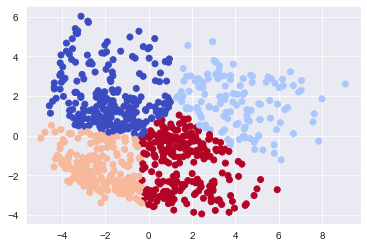

In [265]:
#applying K means
#Here instead of giving any random number for initialzaition, we have mentioned "k-means++", which means it will be one among the data points for faster conversion.

knn = KMeans(n_clusters=4, init = "k-means++")
knn.fit(X)
labels = knn.predict(X)
plt.scatter(X[:,0],X[:,1], c = labels, cmap = 'coolwarm')

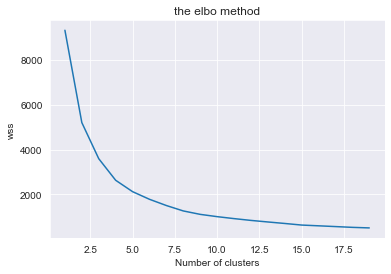

In [264]:
#choosing the right K value for KMeans clustering.
##elbo method
K = range(1,20)
wss = []
for k in K:
    kmeans= KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
    
plt.plot(K,wss)
plt.title('the elbo method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

Seems k =8 is the value we are looking for from the graph, Let's also check silhoutte score - 
Generally, silhoutte score is calculated not on entire data, but some part of the sample.

In [267]:
from sklearn.metrics import silhouette_score
labels = KMeans(n_clusters=8, random_state = 200).fit(X).labels_

silhouette_score (X,labels,sample_size=10000,random_state=200)

0.38995130457952787

In [268]:
for i in range (4,13):
    labels = KMeans(n_clusters=i, random_state = 200).fit(X).labels_
    print("Silhouette_score for k="+str(i)+"is" +str()+str(silhouette_score (X,labels,sample_size=1000,random_state=200)))

Silhouette_score for k=4is0.37453512566402436
Silhouette_score for k=5is0.37844316313686505
Silhouette_score for k=6is0.3800472545777077
Silhouette_score for k=7is0.3740218311830269
Silhouette_score for k=8is0.38995130457952787
Silhouette_score for k=9is0.38533621873998464
Silhouette_score for k=10is0.37833555114032486
Silhouette_score for k=11is0.38028297245406584
Silhouette_score for k=12is0.36841286504137766


hence, we can go ahead with k=8 for clustering

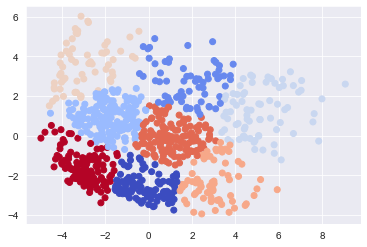

In [269]:
knn = KMeans(n_clusters=8, init = "k-means++")
knn.fit(X)
labels = knn.predict(X)
plt.scatter(X[:,0],X[:,1], c = labels, cmap = 'coolwarm')

In [271]:
#combining resulted labels with dataset
new_data['clusters'] = labels
new_data.head()

,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,Camp_3,...,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,loyal_customer,spending_val_category,Premium_loyalty,target,clusters
household_key,,,,,,,,,,,,,,,,,,,,,
1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,0,...,Type B,2415.56,51,22.2,47.4,False,High,False,High_spending_Notloyal,6
1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,0,...,Type A,2558.82,46,23.7,55.6,False,High,False,High_spending_Notloyal,7
1003,35-44,25-34K,0,Unmarried,1,1 Adult No Kids,0,0,0,0,...,Type A,1404.43,32,21.1,43.9,False,Low,False,Low_spending_Notloyal,7
1004,25-34,15-24K,0,Unmarried,1,1 Adult No Kids,0,0,0,0,...,Type A,2486.93,168,1959.7,14.8,True,High,True,High_spending_loyal,0
101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,0,...,Type A,4483.35,145,1655.0,30.9,True,High,True,High_spending_loyal,1


**Customer's Behavioural study for each cluster**

In [272]:
#resetting index
clusterd_data = new_data.reset_index()

In [274]:
clusterd_data.head()

,household_key,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,Camp_1,Camp_2,...,most_freq_camp_type,Total_purchase,cust_invoice_count,UPT,ATV,loyal_customer,spending_val_category,Premium_loyalty,target,clusters
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,0,0,...,Type B,2415.56,51,22.2,47.4,False,High,False,High_spending_Notloyal,6
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,0,0,...,Type A,2558.82,46,23.7,55.6,False,High,False,High_spending_Notloyal,7
2,1003,35-44,25-34K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,Type A,1404.43,32,21.1,43.9,False,Low,False,Low_spending_Notloyal,7
3,1004,25-34,15-24K,0,Unmarried,1,1 Adult No Kids,0,0,0,...,Type A,2486.93,168,1959.7,14.8,True,High,True,High_spending_loyal,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,0,0,...,Type A,4483.35,145,1655.0,30.9,True,High,True,High_spending_loyal,1


* clusters vs total spend

<AxesSubplot:xlabel='clusters', ylabel='Total_purchase'>

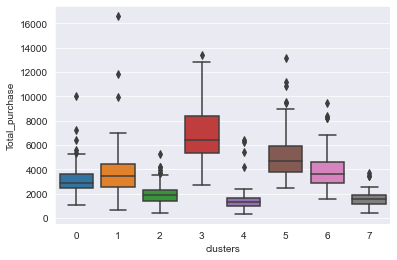

In [292]:
sns.boxplot(x='clusters',y="Total_purchase", data = clusterd_data)

* clusters vs age

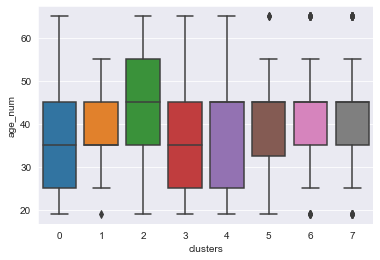

In [306]:
clusterd_data['age_num'] = clusterd_data['age'].str[:2].astype('int8')
sns.boxplot(x='clusters',y="age_num", data = clusterd_data);

* vs Basket size

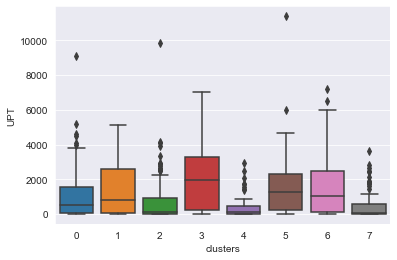

In [307]:
sns.boxplot(x='clusters',y="UPT", data = clusterd_data);

* vs household

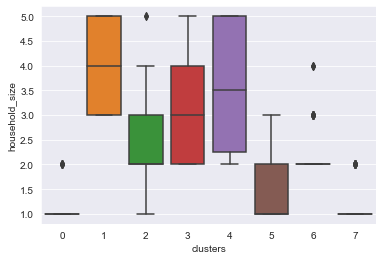

In [318]:
sns.boxplot(x='clusters',y="household_size", data = clusterd_data);

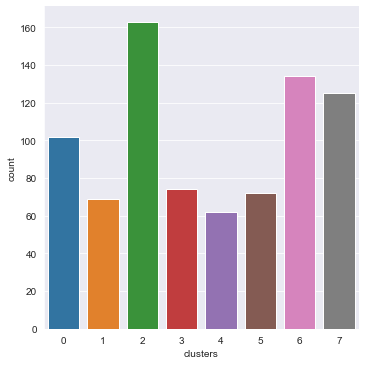

In [320]:
sns.catplot(x='clusters',kind="count", data = clusterd_data);

clusters vs cust_invoice_count

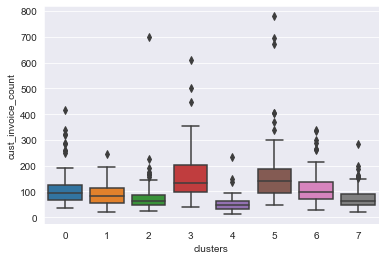

In [321]:
sns.boxplot(x='clusters',y="cust_invoice_count", data = clusterd_data);

customer loyalty & value spending vs clusters

<AxesSubplot:xlabel='clusters', ylabel='Total_purchase'>

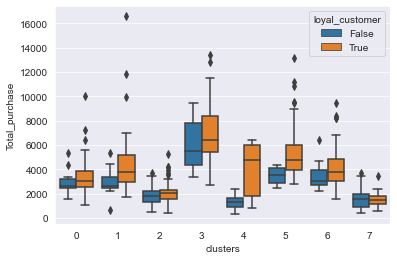

In [323]:
sns.boxplot(x='clusters',y="Total_purchase", hue='loyal_customer', data = clusterd_data)

<AxesSubplot:xlabel='clusters', ylabel='Total_purchase'>

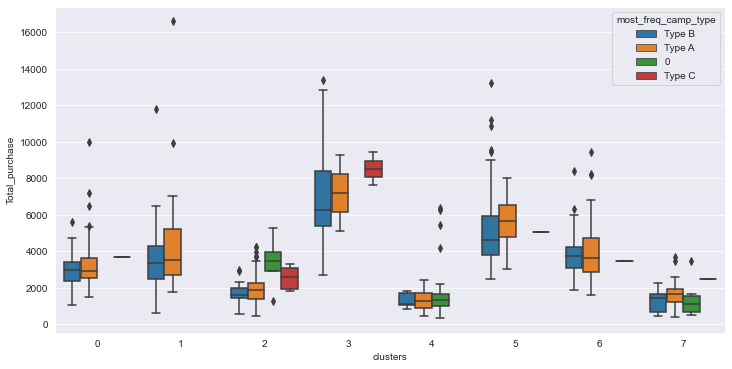

In [335]:
#campaign_type & value spending

from matplotlib import rcParams

rcParams['figure.figsize'] = 12,6
sns.boxplot(x='clusters',y="Total_purchase", hue='most_freq_camp_type', data = clusterd_data)

<AxesSubplot:xlabel='clusters', ylabel='no_of_redeems'>

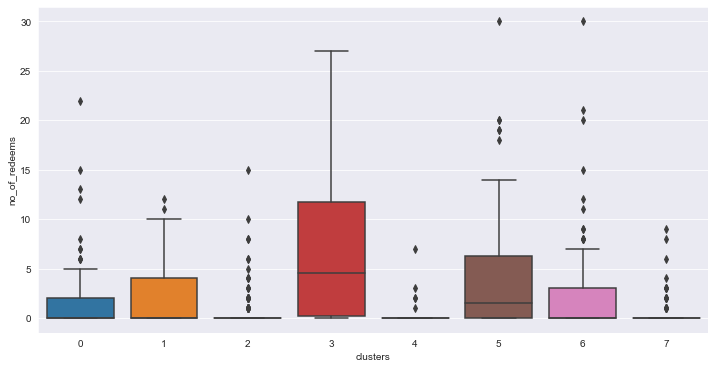

In [337]:
#no_of_redeems
sns.boxplot(x='clusters',y="no_of_redeems", data = clusterd_data)

In [348]:
# vs income
clusterd_data.income

0         35-49K
1         50-74K
2         25-34K
3         15-24K
4      Under 15K
         ...    
796       35-49K
797       35-49K
798       50-74K
799       25-34K
800       75-99K
Name: income, Length: 801, dtype: object

In [387]:
#first creating regex to extract maximum salary (upper level) information
import re
def get_salary_max(row):
    row = row.replace(',','')
    pattern = '([0-9]+)K'
    salary = re.findall(pattern,row)
    if len(salary):
        return salary[0]
    else:
        return None

In [395]:
clusterd_data['income_num'] = clusterd_data['income'].apply(get_salary_max).astype('int16')

In [396]:
clusterd_data[['income','income_num']].sort_values(by='income_num')

,income,income_num
317,Under 15K,15
526,Under 15K,15
326,Under 15K,15
51,Under 15K,15
579,Under 15K,15
...,...,...
439,250K+,250
240,250K+,250
428,250K+,250
457,250K+,250


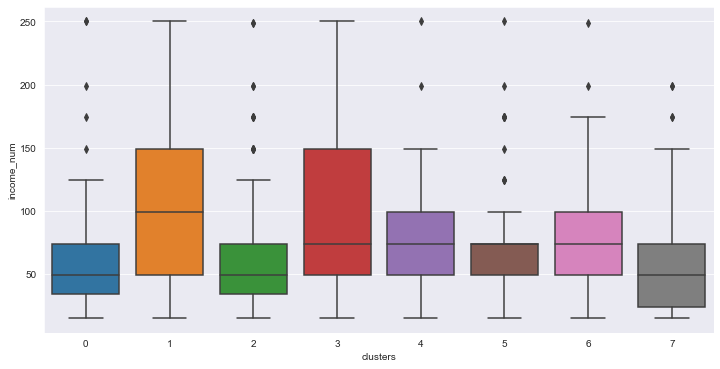

In [397]:
sns.boxplot(x='clusters',y="income_num", data = clusterd_data);

In [ ]:
* kids count vs clusters

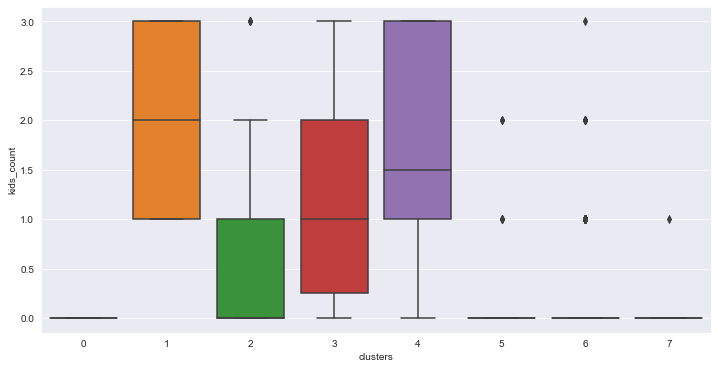

In [406]:
sns.boxplot(x='clusters',y="kids_count", data = clusterd_data);

**findings from clustering:**
    
* number of clusters : basis on similar traits, elbo method and silhoutte score, 8 clusters (0-7) are recommended by KMeans clustering.

* high number of household: cluster 2 have high number of household (160 household out of 801, which is abiut 20%), followed by cluster 6, 7 and 0.

* High purchase value & Basket size: cluster 3 is associated with highest purchase values, whereas 4 & 7 with lowest purchase value. also same is true for basket size. please note these clusters have outliers as seen in box plot, however, these shoudl not be elminited from data and important to keep it

* Household size: cluster 1 have highest median of household size, followed by cluster 4

* invoice count/number of transaction: cluster 5 have highest median among all clusters, and lowest is cluster 4

* customer loyalty & value spending vs clusters: cluster 3 have highest number of loyal customer which are also link to higher purchase value.

* no_of_redeems: cluster 3 have more number of reedems, followed by cluster 5. and cluster 0 have the least.

* age vs cluster: cluster 2 is falling in high median of high age group data

* income vs cluster: cluster 1 is having highest median of high income group data.

* kids count: cluster 1 have highest median of kids count.
    
* **campaign_type (vs total spends) learnings & recommendationg**
    * cluster 3 which has highest purchase value, campaign B was most fequent campaign type associated with higher range of  purchase value., campaign type C was associated with higher median total spend. both can be recommended with focus on total value and basket size to target premium and value customers.
    * cluster 0 & 1 : campaign type A was more effective than others.
    * cluster 2: 'No campaign'  type was  assoicated with higher purchase value
    * cluster 4: campaign type A was slightly more effective than 'No capanign type'. but it can't be esabilish perfectly.
    * cluster 5: campaign type B had a higher range of purchase value and also the outliers. However, campaign type A had higher mediian total spend, which can be considred more effective.
    * cluster 6: campaign type A was more effective, follwed by B.
    * cluster 7:campaign type A was slighly more effective than others.
        

### End of the case study ! Thanks ! Manish Bansal